<a href="https://colab.research.google.com/github/ammarag/AI4Data/blob/main/01_Data_Cleaning_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#read the csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mkjubran/AIData/main/EDA_insurance_modified.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# Information & statistics

In [6]:
#display df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1326 non-null   float64
 1   sex       1319 non-null   object 
 2   bmi       1321 non-null   float64
 3   children  1286 non-null   float64
 4   smoker    1321 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [7]:
#display the df statistics
df.describe()

,age,bmi,children,charges
count,1326.000000,1321.000000,1286.000000,1338.000000
mean,39.276018,31.074561,1.087869,13270.422265
std,14.723437,10.784446,1.200866,12110.011237
min,2.000000,0.000000,0.000000,1121.873900
25%,26.000000,26.200000,0.000000,4740.287150
50%,39.000000,30.360000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,120.000000,200.000000,5.000000,63770.428010


In [8]:
#display count of nan in the df
df.isnull().sum()

age         12
sex         19
bmi         17
children    52
smoker      17
region       0
charges      0
dtype: int64

C:\Users\razang\AppData\Local\Temp\ipykernel_13064\3278617953.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

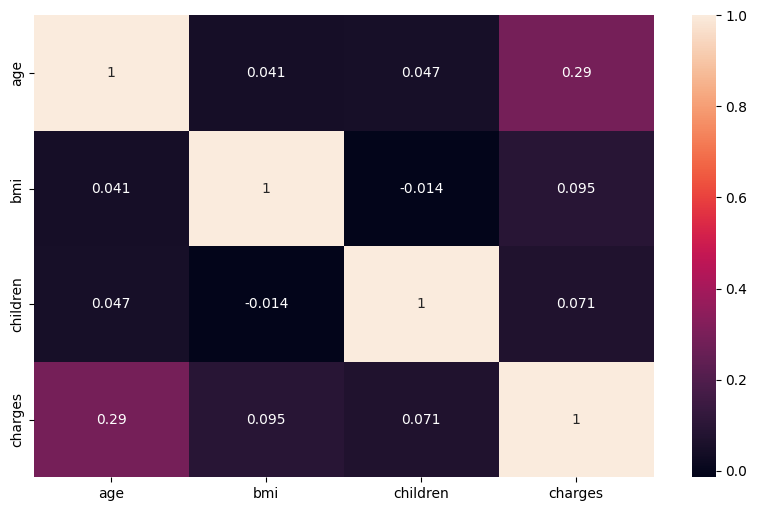

In [9]:
#check the corelation b/t features via correlation map
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

# Handling Missing Values

In [10]:
#remove all nan row
print(df.shape)
df.dropna(how='all', inplace=True)
print(df.shape)

(1338, 7)
(1338, 7)


## Age

In [11]:
#find null fields in all features
print('nan counts: ', str(df['age'].isnull().sum()))
#percent of nan
print(str(round(100 * df['age'].isnull().sum()/len(df['age']),2)) + ' % is missing')

nan counts:  12
0.9 % is missing


In [12]:
df['age'].describe()

count    1326.000000
mean       39.276018
std        14.723437
min         2.000000
25%        26.000000
50%        39.000000
75%        51.000000
max       120.000000
Name: age, dtype: float64

In [13]:
#fill the missing age values with the average
print(df['age'].isnull().sum())
df['age'].fillna(value=df['age'].mean(), inplace=True)
print(df['age'].isnull().sum())

12
0


## Gender

In [14]:
#nan counts
print('nan counts: ', str(df['sex'].isnull().sum()))
#percent of nan
print(str(round(100 * df['sex'].isnull().sum()/len(df['sex']),2)) + ' % is missing')

nan counts:  19
1.42 % is missing


In [15]:
#values counts in gender column 
df['sex'].value_counts()

male      667
female    652
Name: sex, dtype: int64

In [16]:
#fill the messing value in gender column with the mode
print(df['sex'].isnull().sum())
df['sex'].fillna(value=str('male'), inplace=True)
print(df['sex'].isnull().sum())

19
0


## BMI

In [17]:
print('nan counts: ', str(df['bmi'].isnull().sum()))
print('nan percent: ', str(round(100*df['bmi'].isnull().sum()/len(df['bmi']),2)) + ' %')

nan counts:  17
nan percent:  1.27 %


<AxesSubplot: >

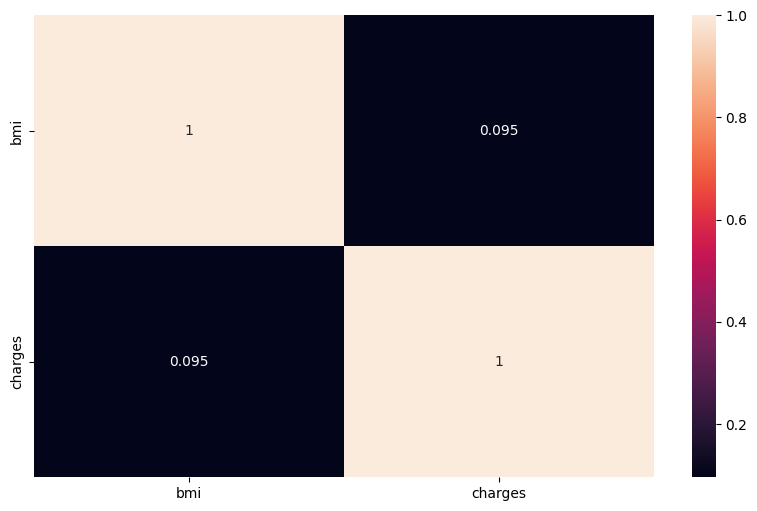

In [18]:
#plot the correlation coofficient b/t charges and bmi
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[['bmi', 'charges']].corr(), annot=True)

In [19]:
print('bmi mean: ' + str(df['bmi'].mean()))
print('bmi median: ' + str(df['bmi'].median()))


bmi mean: 31.07456093868282
bmi median: 30.36


<AxesSubplot: >

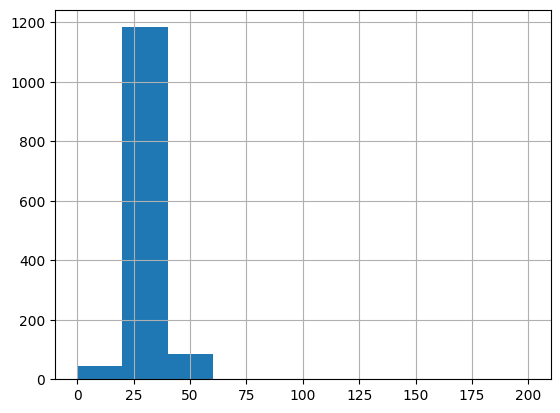

In [20]:
#plot bmi histogram
df['bmi'].hist()

In [21]:
#replace missing values with the mean
print(df['bmi'].isnull().sum())
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)
print(df['bmi'].isnull().sum())

17
0


## children

In [22]:
#fill the missing with the mean
print(df['children'].isnull().sum())
df['children'].fillna(value=round(df['children'].mean(),0), inplace=True)
print(df['children'].isnull().sum())

52
0


## smoker

In [23]:
print('All nan: ' + str(df['smoker'].isnull().sum()))
print('nan percent: ' + str(round(100*df['smoker'].isnull().sum()/len(df['smoker']),2)) + ' %')

All nan: 17
nan percent: 1.27 %


In [24]:
# fill the missing smoker feature with the mode
print(df['smoker'].isnull().sum())
df['smoker'].fillna(value=str(df['smoker'].mode()[0]), inplace=True)
print(df['smoker'].isnull().sum())

17
0


# Remove outliers

In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.276018,31.074561,1.084454,13270.422265
std,14.657215,10.715664,1.177404,12110.011237
min,2.000000,0.000000,0.000000,1121.873900
25%,26.250000,26.237500,0.000000,4740.287150
50%,39.138009,30.495000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16639.912515
max,120.000000,200.000000,5.000000,63770.428010


## Age

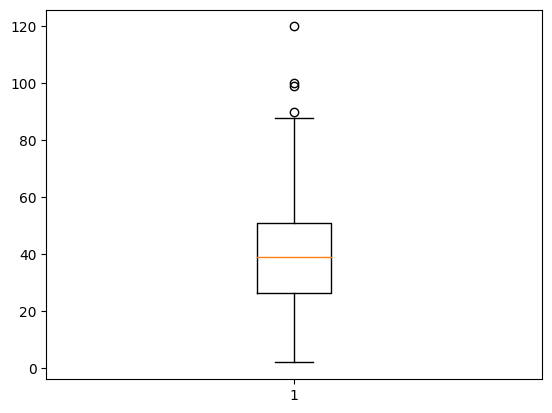

In [26]:
#plot boxplot for age
plt.boxplot(df['age'])
plt.show()

In [27]:
#remove outliers last entry
print(len(df['age']))
df.drop(df[(df['age'] == df['age'].max())].index,inplace=True)
print(len(df['age']))

1338
1337


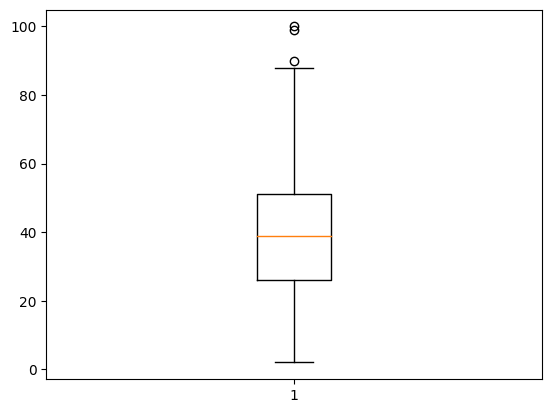

In [28]:
#plot boxplot for age after removing the outliers
plt.boxplot(df['age'])
plt.show()

## BMI

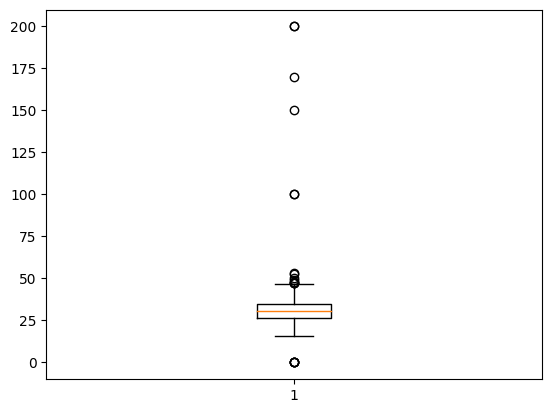

In [29]:
#plot boxplot for bmi
plt.boxplot(df['bmi'])
plt.show()

In [30]:
#remove outliers below 5% and above 95%
print(len(df['bmi']))
df.drop(df[(df['bmi'] > df['bmi'].quantile(0.95)) | (df['bmi'] < df['bmi'].quantile(0.05))].index,inplace=True)
print(len(df['bmi']))

1337
1203


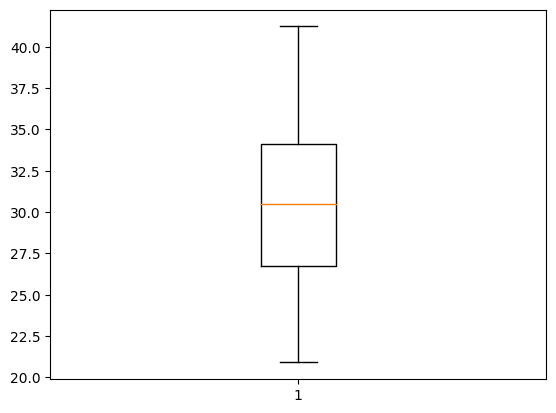

In [31]:
#plot boxplot for bmi after removing the outliers
plt.boxplot(df['bmi'])
plt.show()

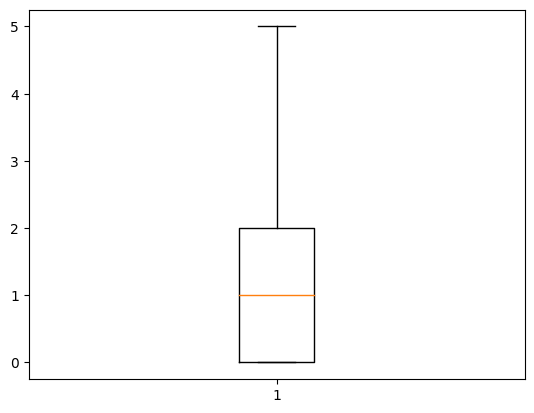

In [32]:
#plot boxplot for children
plt.boxplot(df['children'])
plt.show()

# Save Data

In [33]:
df.to_csv("./EDA_insurance_modified_cleaned.csv", sep=",", index=False)